# Metropolis-Hastings

## III. Le voyageur de commerce

### 3.1

Lorsque N n'est pas petit, il est impossible de comparer tous les trajectoires pour trouver le plus court.

### 3.2 & 3.3

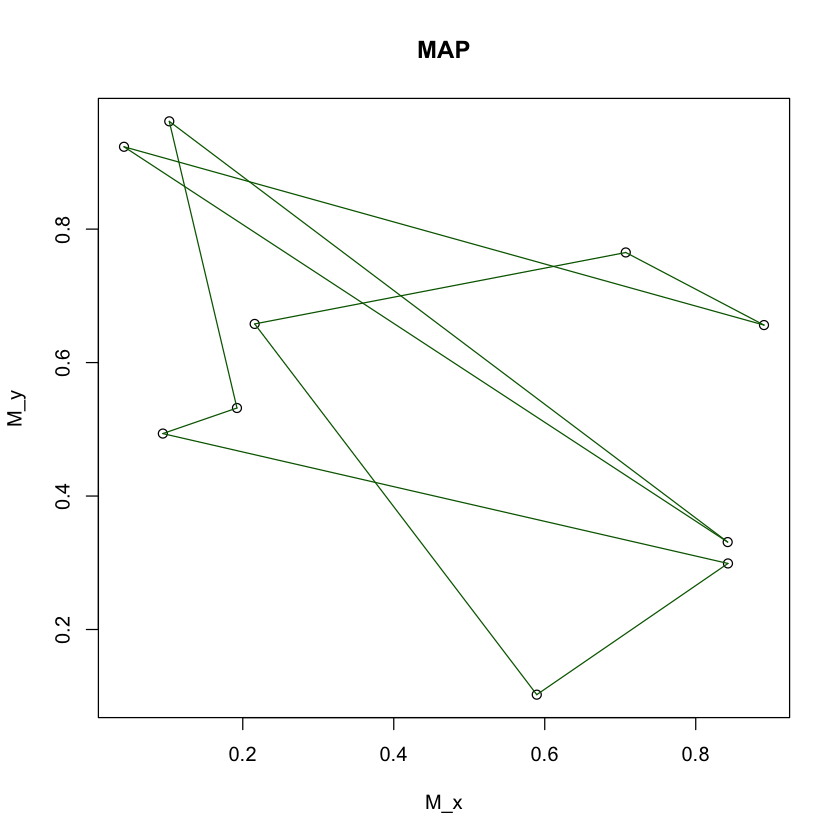

In [11]:
N = 10
M_x = runif(10)
M_y = runif(10)
plot(M_x,M_y,main = "MAP")
for ( i  in 1:9){
    segments(M_x[i],M_y[i],M_x[i+1],M_y[i+1],col="darkgreen")
}
segments(M_x[1],M_y[1],M_x[N],M_y[N],col = "darkgreen")

In [12]:
#la matrice de distance
M_dist = as.matrix(dist(cbind(M_x,M_y)))
M_dist

,1,2,3,4,5,6,7,8,9,10
1,0.0000000,0.6695507,0.6730917,0.6303740,0.9864525,0.3409341,0.9874990,0.5850360,0.6312154,0.3206412
2,0.6695507,0.0000000,0.5031053,0.6746739,0.3169240,0.7067091,0.3239906,0.1281562,0.2044061,0.7224115
3,0.6730917,0.5031053,0.0000000,0.2129944,0.6832642,0.4545239,0.6358114,0.5653318,0.6705706,0.4853000
4,0.6303740,0.6746739,0.2129944,0.0000000,0.8888653,0.3287435,0.8448802,0.7091153,0.8127244,0.3603990
5,0.98645253,0.31692397,0.68326424,0.88886531,0.00000000,0.99516354,0.07105728,0.41909169,0.43283891,1.01485258
6,0.34093408,0.70670907,0.45452392,0.32874345,0.99516354,0.00000000,0.97193334,0.68036373,0.76564872,0.03202315
7,0.98749900,0.32399058,0.63581137,0.84488025,0.07105728,0.97193334,0.00000000,0.43884650,0.46796375,0.99328996
8,0.5850360,0.1281562,0.5653318,0.7091153,0.4190917,0.6803637,0.4388465,0.0000000,0.1053637,0.6908581
9,0.6312154,0.2044061,0.6705706,0.8127244,0.4328389,0.7656487,0.4679637,0.1053637,0.0000000,0.7734538
10,0.32064115,0.72241153,0.48529996,0.36039904,1.01485258,0.03202315,0.99328996,0.69085808,0.77345377,0.00000000


### 3.4

On va optimiser :
$$\underset{\sigma \in \mathcal{S}_N }{argmin} \ D_{\sigma}$$

### 3.5

Il faut tirer $(l,l') \in N \times N$ uniformément.

### 3.6

In [13]:
transition_sigma = function (sigma){
    #l = ceiling(runif(2,0,10))
    l = sample(1:10,2,replace = T)
    new_sigma = sigma
    new_sigma[l] = sigma[c(l[2],l[1])]
    return(new_sigma)
}

D_sigma = function (X,N = 10){
    X = as.numeric(X)
    d = 0
    trace = append(X,X[1])
    #print(trace)
    
    for (i in 1:N){
        d = d + M_dist[trace[i],trace[i+1]] 
    }
    
    return(d)
}
#test function
a = sample(1:10,10)
print (a)
print(transition_sigma(a))
print(D_sigma(a))

 [1]  1  5  8 10  6  4  9  2  3  7
 [1]  1  5  8 10  6  4  9  7  3  2
[1] 5.600715


In [59]:
#Metropolis
n = 1000
dist = 1000
X = list(sample(1:10,10))
for (i in 1:n){
    dist = append(dist,D_sigma(X[[i]]))
    Y = transition_sigma(X[[i]])
    r = exp(D_sigma(X[[i]])-D_sigma(Y))
    if (runif(1) <= r){
        X[[i+1]] = Y
    }else{
        X[[i+1]] = X[[i]] 
}}
#print (X[n-50:n])
sigma_min = X[[which.min(dist)-1]]
D_sigma(sigma_min)

[1] 3.203633

### 4.7

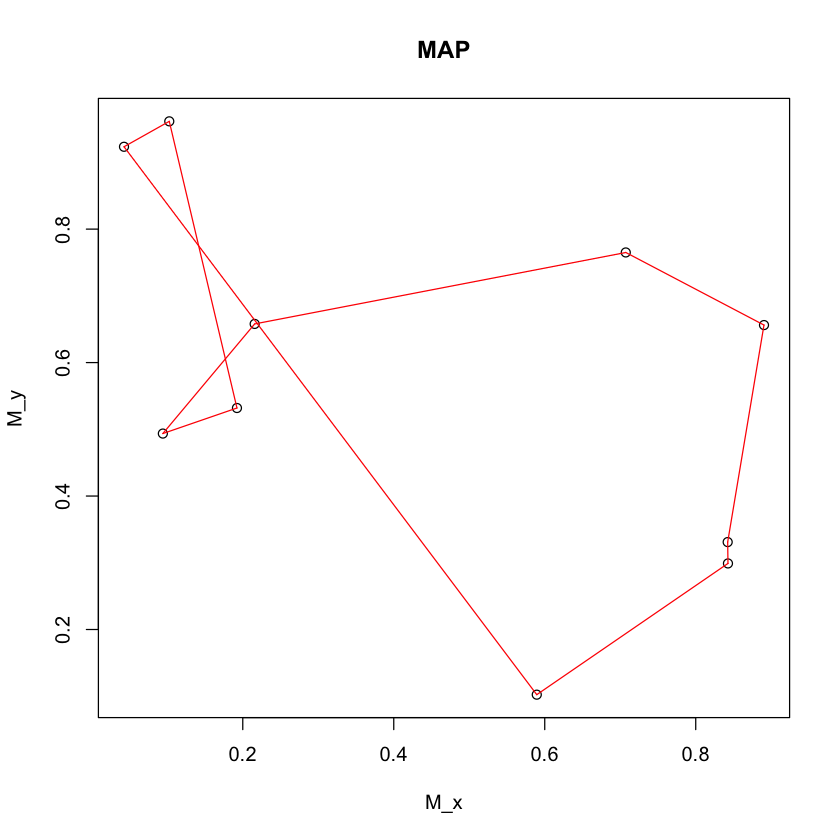

In [60]:
plot(M_x,M_y,main = "MAP")
for ( i  in 1:N){
    segments(M_x[sigma_min[i]],M_y[sigma_min[i]],M_x[sigma_min[i+1]],M_y[sigma_min[i+1]],col="red")
}
segments(M_x[sigma_min[1]],M_y[sigma_min[1]],M_x[sigma_min[10]],M_y[sigma_min[10]],col="red")


### 4.8 recuit simulé.

#### température 1/log(n) :

In [81]:
n = 1000
dist = 400000
X = list(sample(1:10,10))
T_n = 1/log(n)
for (i in 1:n){
    dist = append(dist,D_sigma(X[[i]]))
    Y = transition_sigma(X[[i]])
    r = exp(D_sigma(X[[i]])-D_sigma(Y))*exp(1/T_n*(D_sigma(X[[i]])-D_sigma(Y)))
    if (runif(1) <= r){
        X[[i+1]] = Y
    }else{
        X[[i+1]] = X[[i]] 
}}
#print (X[n-50:n])
sigma_min = X[[which.min(dist)-1]]
D_sigma(sigma_min)

[1] 2.78293

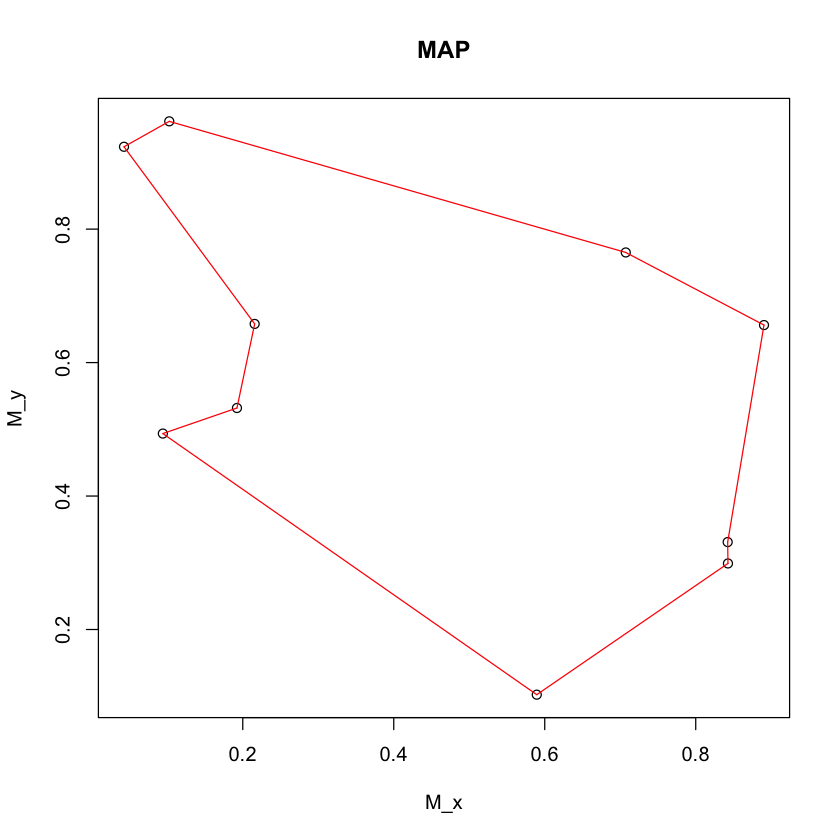

In [82]:
plot(M_x,M_y,main = "MAP")
for ( i  in 1:N){
    segments(M_x[sigma_min[i]],M_y[sigma_min[i]],M_x[sigma_min[i+1]],M_y[sigma_min[i+1]],col="red")
}
segments(M_x[sigma_min[1]],M_y[sigma_min[1]],M_x[sigma_min[10]],M_y[sigma_min[10]],col="red")



#### température $n^{-\gamma}$ avec $\gamma = 10$:

In [79]:
n = 1000
dist = 400000
X = list(sample(1:10,10))
gamma = 10
T_n = n^(-gamma)
for (i in 1:n){
    dist = append(dist,D_sigma(X[[i]]))
    Y = transition_sigma(X[[i]])
    r = exp(D_sigma(X[[i]])-D_sigma(Y))*exp(1/T_n*(D_sigma(X[[i]])-D_sigma(Y)))
    if (runif(1) <= r){
        X[[i+1]] = Y
    }else{
        X[[i+1]] = X[[i]] 
}}
#print (X[n-50:n])
sigma_min = X[[which.min(dist)-1]]
D_sigma(sigma_min)

[1] 3.046992

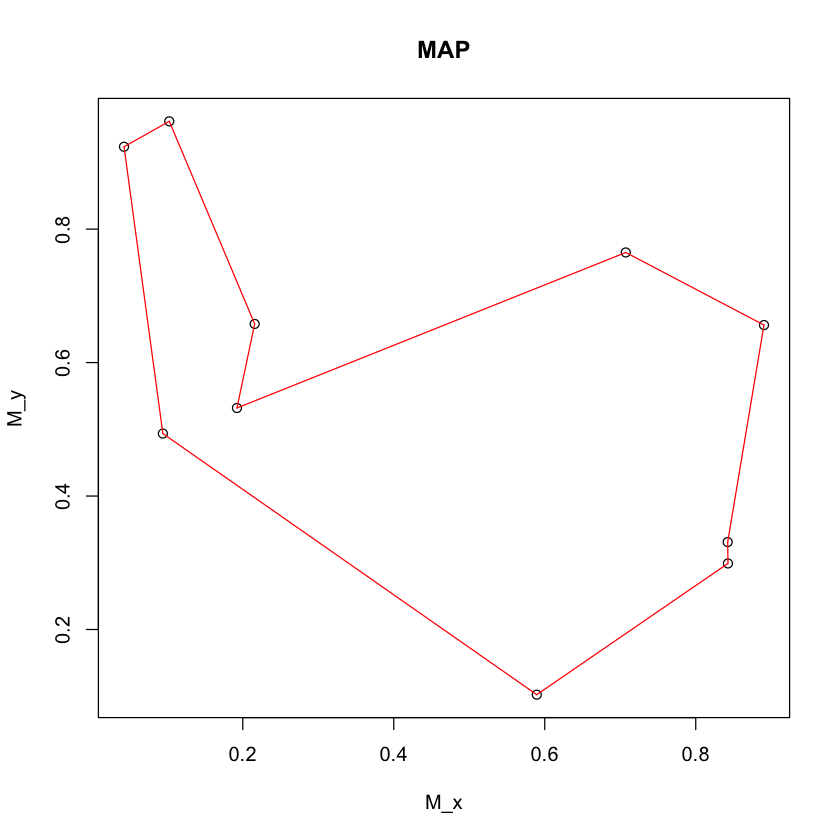

In [80]:
plot(M_x,M_y,main = "MAP")
for ( i  in 1:N){
    segments(M_x[sigma_min[i]],M_y[sigma_min[i]],M_x[sigma_min[i+1]],M_y[sigma_min[i+1]],col="red")
}
segments(M_x[sigma_min[1]],M_y[sigma_min[1]],M_x[sigma_min[10]],M_y[sigma_min[10]],col="red")



#### température $n^{-\gamma}$ avec $\gamma = 1$:

In [67]:
n = 1000
dist = 400000
X = list(sample(1:10,10))
gamma = 1
T_n = n^(-gamma)
for (i in 1:n){
    dist = append(dist,D_sigma(X[[i]]))
    Y = transition_sigma(X[[i]])
    r = exp(D_sigma(X[[i]])-D_sigma(Y))*exp(1/T_n*(D_sigma(X[[i]])-D_sigma(Y)))
    if (runif(1) <= r){
        X[[i+1]] = Y
    }else{
        X[[i+1]] = X[[i]] 
}}
#print (X[n-50:n])
sigma_min = X[[which.min(dist)-1]]
D_sigma(sigma_min)

[1] 2.78293

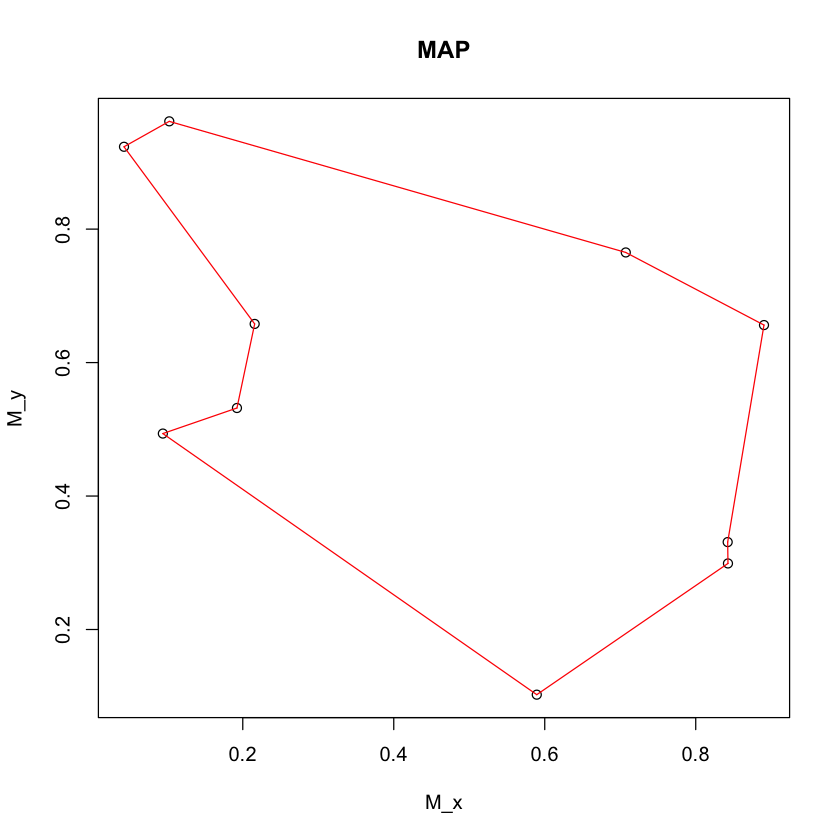

In [68]:
plot(M_x,M_y,main = "MAP")
for ( i  in 1:N){
    segments(M_x[sigma_min[i]],M_y[sigma_min[i]],M_x[sigma_min[i+1]],M_y[sigma_min[i+1]],col="red")
}
segments(M_x[sigma_min[1]],M_y[sigma_min[1]],M_x[sigma_min[10]],M_y[sigma_min[10]],col="red")




### Conclusion :

On peut voir que la méthode de recuit simulé est bcp plus efficace que la méthode classique de M-H.

Mais pour le température qui décroit trop vite($\gamma = 10$), il est plus possible que la solution est un minimum local.

## IV. Metropolis : exemple jouet

### 4.1

$q(x,y)$ est la densité de $Y = x+U$ où $U \sim \mathcal{U}(-\frac12,\frac12)$.

Alors, $Y \sim \mathcal{U}(x-\frac12,x+\frac12)$.

Donc, on a :

$$q(x,y) =\mathbb{1}_{\{x-\frac12,x+\frac12\}}$$

$$q(y,x) =\mathbb{1}_{\{y-\frac12,y+\frac12\}}$$

### 4.2

* Partant $X_n = i$, simuler $Y = j$ suivant $q(X_n,y)$.

* Calculer le rapport d'acceptation : $$r_{ij} = \frac{\frac{1}{\sqrt{2\pi}}\mathrm{e}^{-\frac12j^2} }{\frac{1}{\sqrt{2\pi}}\mathrm{e}^{-\frac12i^2}} = \mathrm{e}^{\frac12(i^2-j^2)}$$

* Simuler $U \sim \mathcal{U}(0,1)$ : 

     * Si $U \leq r_{ij}$ : $X_{n+1} = Y = j$ ;

     * Si $U > r_{ij}$ : $X_{n+1} = X_{n} = i$ .

### 4.3 & 4.4

In [15]:
n = 10000
X = runif(1,-3,3)

for (i in 1:n){
    Y = runif(1,X[i]-1/2,X[i]+1/2)
    r = exp(1/2*(X[i]^2 - Y^2))
    if (runif(1) <= r){
        X=append(X,Y)
    }else{
        X=append(X,X[i])
    }
}

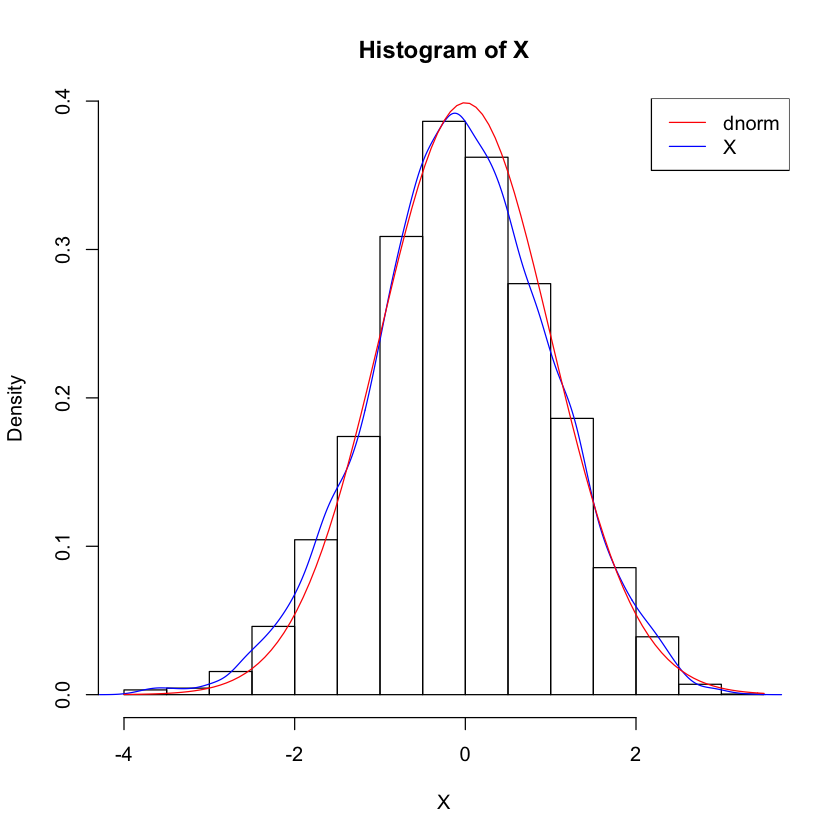

In [20]:
hist(X,probability = T)
lines(density(X),col = "blue")
curve(dnorm(x),add = T,col ="red")
legend("topright",c("dnorm","X"),col = c("red","blue"),lty = c(1,1))

### 4.5

In [28]:
#?unique
length(unique(X))/length(X)

[1] 0.8976102

Le taux d'acceptance est 89,76%.

### 4.6

Maintenant, on prend $X_0 = 10$ :

In [29]:
n = 10000
X = 10

for (i in 1:n){
    Y = runif(1,X[i]-1/2,X[i]+1/2)
    r = exp(1/2*(X[i]^2 - Y^2))
    if (runif(1) <= r){
        X=append(X,Y)
    }else{
        X=append(X,X[i])
    }
}

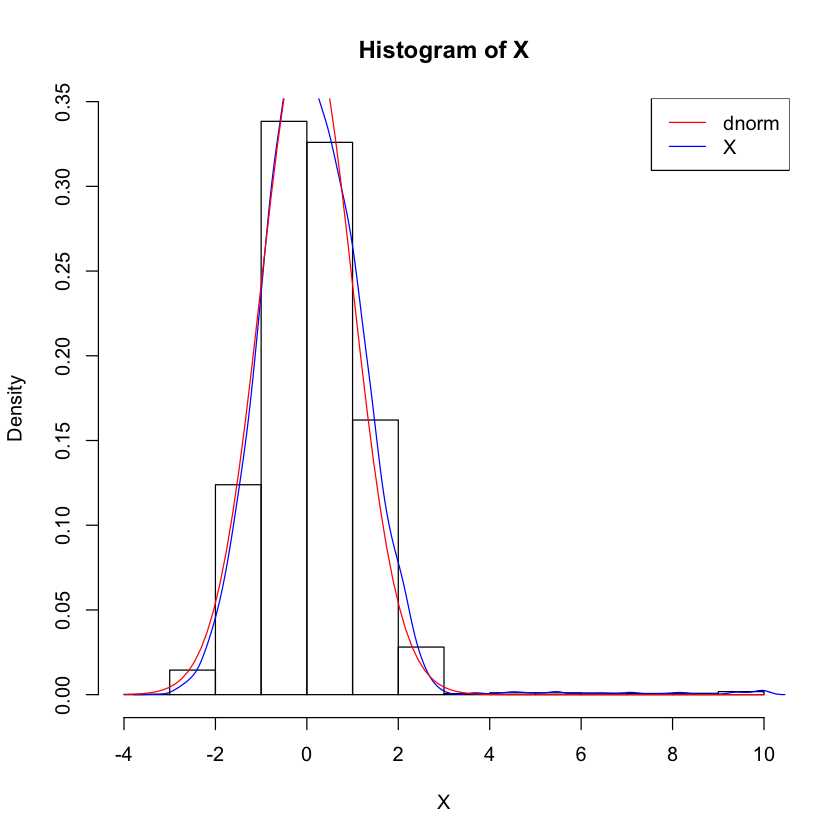

In [30]:
hist(X,probability = T)
lines(density(X),col = "blue")
curve(dnorm(x),add = T,col ="red")
legend("topright",c("dnorm","X"),col = c("red","blue"),lty = c(1,1))

In [31]:
#pour le taux d'acceptance :
length(unique(X))/length(X)

[1] 0.8957104

#### Conclusion :
Il ne chante près que rien.

### 4.7

* $U \sim \mathcal{U}(-10,10)$

In [32]:
n = 10000
X = runif(1,-3,3)

for (i in 1:n){
    Y = runif(1,X[i]-10,X[i]+10)
    r = exp(1/2*(X[i]^2 - Y^2))
    if (runif(1) <= r){
        X=append(X,Y)
    }else{
        X=append(X,X[i])
    }
}

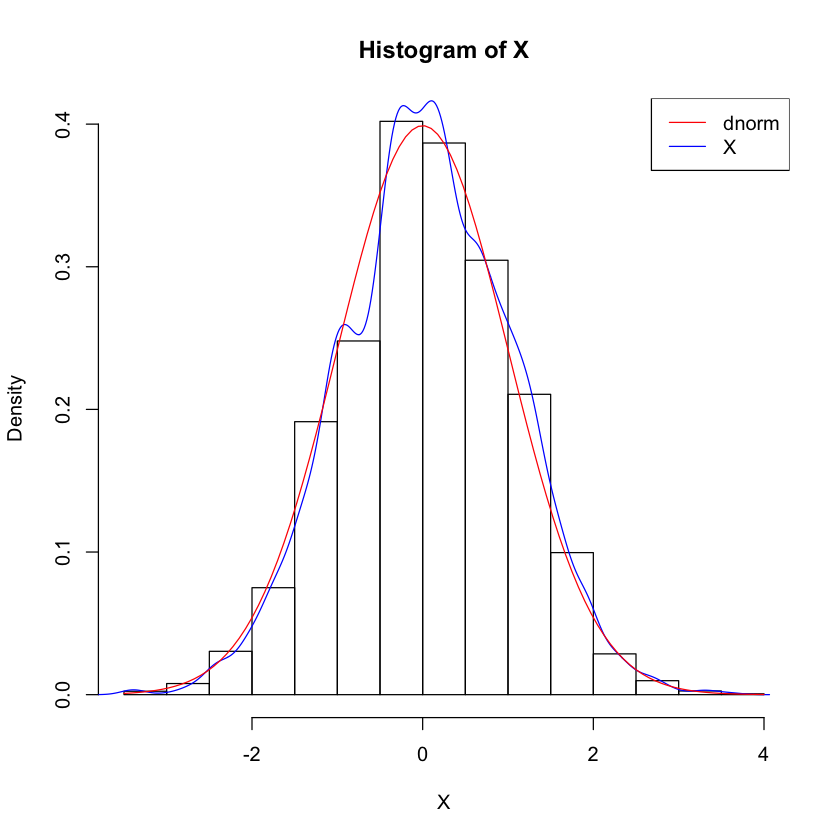

In [33]:
hist(X,probability = T)
lines(density(X),col = "blue")
curve(dnorm(x),add = T,col ="red")
legend("topright",c("dnorm","X"),col = c("red","blue"),lty = c(1,1))

In [34]:
length(unique(X))/length(X)

[1] 0.1556844

On peut voir que le taux d'acceptation diminue.

* $U \sim \mathcal{U}(-0.1,0.1)$

In [45]:
n = 10000
X = runif(1,-3,3)

for (i in 1:n){
    Y = runif(1,X[i]-0.1,X[i]+0.1)
    r = exp(1/2*(X[i]^2 - Y^2))
    if (runif(1) <= r){
        X=append(X,Y)
    }else{
        X=append(X,X[i])
    }
}

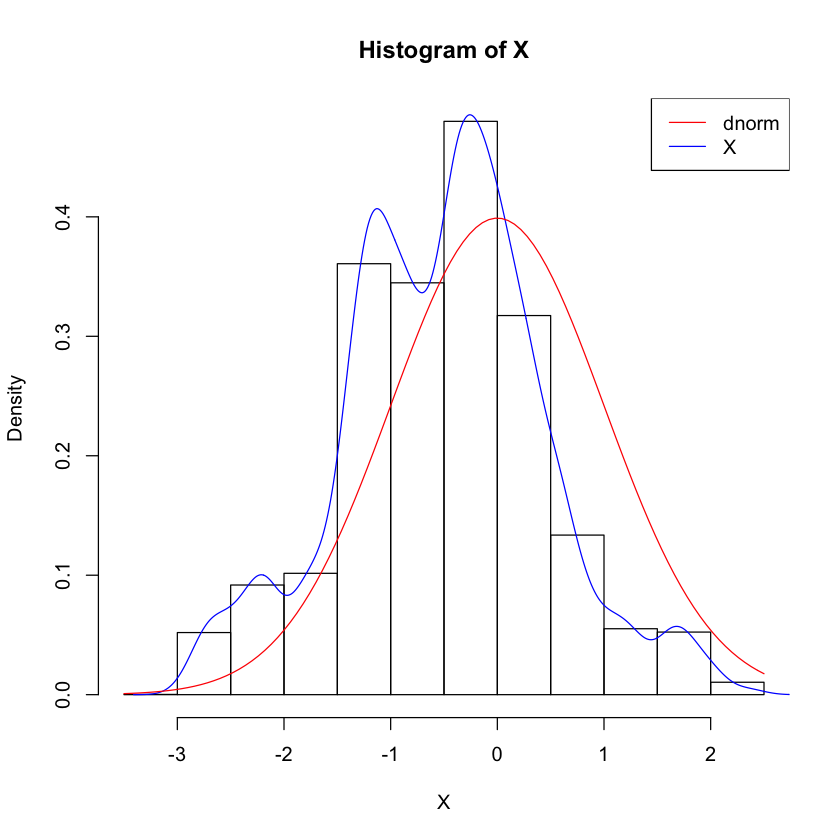

In [46]:
hist(X,probability = T)
lines(density(X),col = "blue")
curve(dnorm(x),add = T,col ="red")
legend("topright",c("dnorm","X"),col = c("red","blue"),lty = c(1,1))

In [38]:
length(unique(X))/length(X)

[1] 0.9806019

On peut voir que le taux d'acceptation augmente.
Mais la qualité d'estimation devient très mauvais, c-à-d, on a besoin de plus de échantillon pour avoir la convergence de la chaîne.